#### Частина 1. Data Cleaning and EDA

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import random
random.seed(42) 

import warnings
warnings.filterwarnings('ignore')

import os

In [3]:
data_path = "ab_test.csv"
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
else:
    raise FileNotFound(f'File {data_path} not found')

In [48]:
df.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
6,679687,26:46.9,treatment,new_page,1
7,719014,48:29.5,control,old_page,0
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1


In [5]:
df.columns = ["user_id", "timestamp", "group", "landing_page", "converted"] # rename
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [6]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [7]:
df.tail(2)

,user_id,timestamp,group,landing_page,converted
294476,697314,20:29.0,control,old_page,0
294477,715931,40:24.5,treatment,new_page,0


In [8]:
df.sample(4)

,user_id,timestamp,group,landing_page,converted
118631,726447,58:07.7,control,old_page,0
135850,818840,16:36.1,treatment,new_page,0
124167,858553,30:41.2,treatment,new_page,0
257212,643553,13:53.1,treatment,new_page,0


In [9]:
df.shape

(294478, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [11]:
df['timestamp'].max(), df['timestamp'].min()

('59:59.9', '00:00.0')

In [12]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [13]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [14]:
convert_df = df.groupby('landing_page')['converted'].sum().reset_index()

In [15]:
convert_df

,landing_page,converted
0,new_page,17498
1,old_page,17739


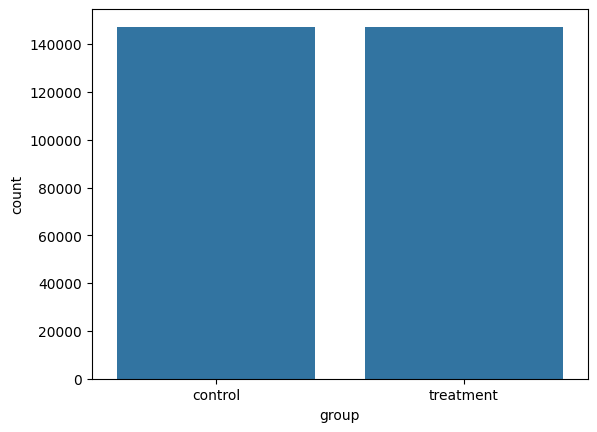

In [16]:
sns.countplot(x = df['group']);

In [17]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of unique users: {df.user_id.nunique()}')

Number of rows: 294478
Number of unique users: 290584


In [18]:
# Чи збігаються номери new_page та treatment?
n_treat = df[df["group"] == "treatment"].shape[0]
n_new_page = df[df["landing_page"] == "new_page"].shape[0]
difference = n_treat - n_new_page

pd.DataFrame({
    'N treatment': [n_treat],
    'N new_page': [n_new_page],
    'Difference': [difference]
})

,N treatment,N new_page,Difference
0,147276,147239,37


In [19]:
# unmatch 
df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")]

,user_id,timestamp,group,landing_page,converted
308,857184,34:59.8,treatment,old_page,0
327,686623,26:40.7,treatment,old_page,0
357,856078,29:30.4,treatment,old_page,0
685,666385,11:54.8,treatment,old_page,0
713,748761,47:44.4,treatment,old_page,0
...,...,...,...,...,...
293773,688144,34:50.5,treatment,old_page,1
293817,876037,15:09.0,treatment,old_page,1
293917,738357,37:55.7,treatment,old_page,0
294014,813406,25:33.2,treatment,old_page,0


In [20]:
df_mismatch = df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")
               |(df["group"] == "control") & (df["landing_page"] == "new_page")]

n_mismatch = df_mismatch.shape[0]

percent_mismatch = round(n_mismatch / len(df) * 100, 2)
print(f'Number of mismatched rows: {n_mismatch} rows')
print(f'Percent of mismatched rows: {percent_mismatch} percent')

Number of mismatched rows: 3893 rows
Percent of mismatched rows: 1.32 percent


In [21]:
df2 = df[(df["group"] == "treatment") & (df["landing_page"] == "new_page")
        |(df["group"] == "control") & (df["landing_page"] == "old_page")]

len(df2)

290585

In [22]:
df_mismatch = df2[(df2["group"] == "treatment") & (df2["landing_page"] == "old_page")
               |(df2["group"] == "control") & (df2["landing_page"] == "new_page")]

n_mismatch = df_mismatch.shape[0]

percent_mismatch = round(n_mismatch / len(df2) * 100, 2)
print(f'Number of mismatched rows: {n_mismatch} rows')
print(f'Percent of mismatched rows: {percent_mismatch} percent')

Number of mismatched rows: 0 rows
Percent of mismatched rows: 0.0 percent


In [23]:
df2[df2.duplicated("user_id") == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,55:59.6,treatment,new_page,0


In [46]:
df2.groupby('group')['user_id'].count()

group
control      145274
treatment    145311
Name: user_id, dtype: int64

#### Частина 2. Probability

In [24]:
df2.converted.mean() * 100

np.float64(11.959667567149026)

In [28]:
df2.user_id = df2.user_id.astype(str)
df2.groupby("group")['converted'].mean() * 100

group
control      12.038630
treatment    11.880725
Name: converted, dtype: float64

In [27]:
pd.DataFrame(df2.landing_page.value_counts(normalize = True) * 100)

,proportion
landing_page,
new_page,50.006366
old_page,49.993634


> Чи є достатньо доказів, щоб зробити висновок, що нова сторінка тестування призводить до більшої кількості конверсій? \
> Імовірність того, що особа отримала нову сторінку, становить 50%. \
> Імовірність того, що особа здійснить конверсію незалежно від сторінки, яку вона отримала, становить 11,96%. \
> Враховуючи, що особа перебувала в контрольній групі, ймовірність її конверсії становить 12,04%. \
> Враховуючи, що особа перебувала в групі тестування, ймовірність її конверсії становить 11,88%. \
> 1 до 4 свідчить про те, що між групою тестування та контрольною групою немає істотної різниці в конверсії. Отже, ми можемо зробити висновок, що нова сторінка тестування не має впливу і не призводить до збільшення кількості конверсій.


#### Частина 3. A/B Test

In [30]:
means_diff = []
size = df.shape[0]
for _ in range(1000):
    sample = df2.sample(size, replace = True)
    control_mean = sample[sample["group"] == "control"]["converted"].mean()
    treat_mean = sample[sample["group"] == "treatment"]["converted"].mean()
    means_diff.append(treat_mean - control_mean)

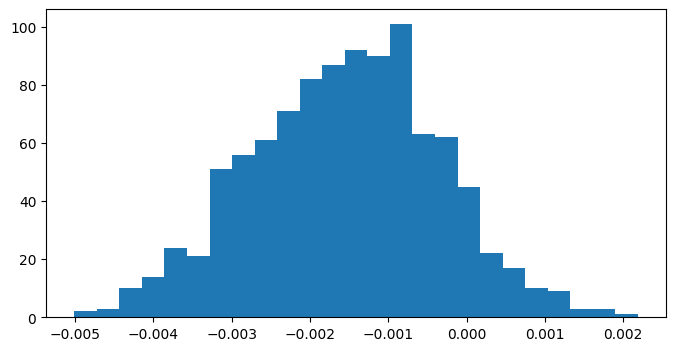

In [47]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(means_diff, bins = 25)
plt.show()

In [32]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_vals, bins = 25)
plt.show()

NameError: name 'null_vals' is not defined

<Figure size 800x400 with 0 Axes>

In [ ]:
control_mean = df2[df2["group"] == "control"]["converted"].mean()
treat_mean = df2[df2["group"] == "treatment"]["converted"].mean()
obs_diff = treat_mean - control_mean

plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_vals, bins = 25)
plt.axvline(obs_diff, c='red')
plt.show()

In [ ]:
(null_vals > obs_diff).mean()

In [33]:
pd.crosstab(df2["group"], df2["landing_page"])


landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


In [34]:
conv = df2.groupby("group")["converted"].agg(["sum", "count"])
conv


,sum,count
group,,
control,17489,145274
treatment,17264,145311


In [35]:
control = df2[df2.group == "control"]["converted"]
treat   = df2[df2.group == "treatment"]["converted"]


In [36]:
n_c = len(control)
n_t = len(treat)

x_c = control.sum()
x_t = treat.sum()

In [ ]:
p_c = x_c / n_c
p_t = x_t / n_t

p_c, p_t, p_t - p_c


(np.float64(0.1203863045004612),
 np.float64(0.11880724790277405),
 np.float64(-0.0015790565976871451))

In [38]:
from scipy.stats import norm


p_pool = (x_c + x_t) / (n_c + n_t)


se = np.sqrt(p_pool * (1 - p_pool) * (1/n_c + 1/n_t))


z = (p_t - p_c) / se

p_value = 2 * (1 - norm.cdf(abs(z)))

z, p_value


(np.float64(-1.3116075339133115), np.float64(0.18965258971881793))

In [39]:

table = np.array([
    [control.sum(), control.count() - control.sum()],
    [treat.sum(),   treat.count()   - treat.sum()]
])

table

array([[ 17489, 127785],
       [ 17264, 128047]])

In [40]:
# Chi2
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(table)
chi2, p_value


(np.float64(1.7053502645115), np.float64(0.19158976298516012))

In [41]:
# Fisher 
from scipy.stats import fisher_exact

odds_ratio, p_value = fisher_exact(table)
odds_ratio, p_value


(np.float64(1.0151099413319618), np.float64(0.19047607131914907))

In [ ]:
z_alpha = 
z_beta = 
p0 = 

In [ ]:
mde = (z_alpha + z_beta) * np.sqrt(2 * p0 * (1 - p0) / n)

mde

In [ ]:
real_uplift = p_t - p_c

real_uplift, mde


#### Data Regression (after lessons)

In [42]:
df2["intercept"] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,11:48.6,control,old_page,0,1
1,804228,01:45.2,control,old_page,0,1
2,661590,55:06.2,treatment,new_page,0,1
3,853541,28:03.1,treatment,new_page,0,1
4,864975,52:26.2,control,old_page,1,1
